# Summary

In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter f|or jupyter lab
%load_ext lab_black

%run ../src/notebook_env.py


---------------------------------
Working on the host: unknownA07817A930E2

---------------------------------
Python version: 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/idz-parostatus/bin/python

---------------------------------
Root (ROOT) directory is set to /Users/jokr/Documents/Projekte_Extern/IDZ/DMS-V-ParoStatus
---------------------------------
data (DATA) directory is set to /Users/jokr/Documents/Projekte_Extern/IDZ/DMS-V-ParoStatus/data
---------------------------------
Attaching the following source folders:
/Users/jokr/Documents/Projekte_Extern/IDZ/DMS-V-ParoStatus/src


**Import modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from util import simple_table

## Load cohort dataset

In [4]:
fp = DATA.joinpath("processed")
fn = "dmsV_staged_extend_periodontitis_cases.parquet"
file = fp.joinpath(fn)
assert file.exists()
data_paro = pd.read_parquet(file)

fn = "dmsV_non_periodontitis_patient.parquet"
file = fp.joinpath(fn)
assert file.exists()
data_nonparo = pd.read_parquet(file)

data = pd.concat([data_paro, data_nonparo])
data.shape

(980, 752)

## Results

### Classification

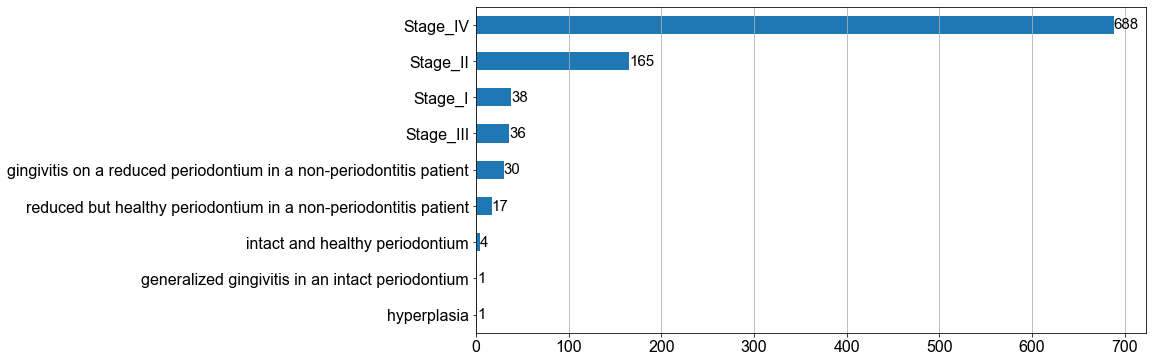

In [5]:
ax = data["classification"].value_counts().sort_values().plot.barh()
for container in ax.containers:
    ax.bar_label(container, size=15)
ax.grid(axis="x")
# print(data["extend"].notnull().sum())

In [6]:
simple_table(df=data, col="classification", digit=3)

,Absolute,Percentage
Stage_I,38.0,3.878
Stage_II,165.0,16.837
Stage_III,36.0,3.673
Stage_IV,688.0,70.204
generalized gingivitis in an intact periodontium,1.0,0.102
gingivitis on a reduced periodontium in a non-periodontitis patient,30.0,3.061
hyperplasia,1.0,0.102
intact and healthy periodontium,4.0,0.408
reduced but healthy periodontium in a non-periodontitis patient,17.0,1.735
Total,980.0,100.000


### Extend

In [7]:
simple_table(df=data, col="extend", digit=3)

,Absolute,Percentage
generalized (≥30%),482.0,64.525
localized (<30%),265.0,35.475
Total,747.0,100.000


### Classification and Extend

In [8]:
data.loc[data[["classification", "extend"]].notnull().all(axis=1), "res"] = data.loc[
    data[["classification", "extend"]].notnull().all(axis=1),
    ["classification", "extend"],
].apply(lambda x: " - ".join(x), axis=1)
# data["res"] = data["res"].apply(lambda x: str(x).replace("_", " "))

In [9]:
simple_table(df=data, col="res", digit=3)

,Absolute,Percentage
Stage_I - generalized (≥30%),3.0,0.402
Stage_I - localized (<30%),2.0,0.268
Stage_II - generalized (≥30%),98.0,13.119
Stage_II - localized (<30%),38.0,5.087
Stage_III - generalized (≥30%),12.0,1.606
Stage_III - localized (<30%),2.0,0.268
Stage_IV - generalized (≥30%),369.0,49.398
Stage_IV - localized (<30%),223.0,29.853
Total,747.0,100.001


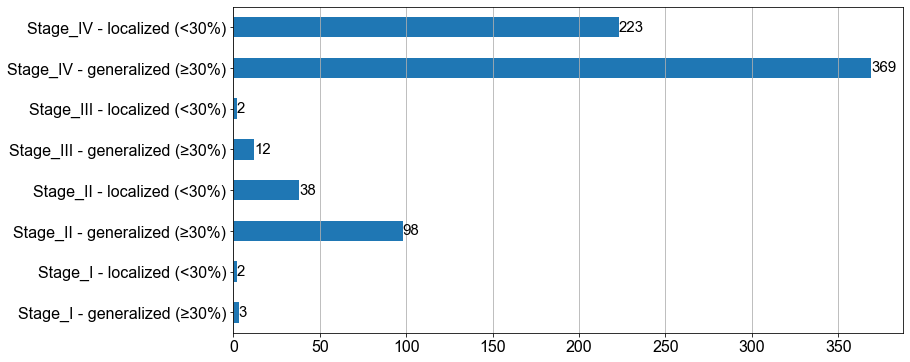

In [10]:
ax = data["res"].value_counts().sort_index().plot.barh()
for container in ax.containers:
    ax.bar_label(container, size=15)
ax.grid(axis="x")

## Stratification based on age group

### Classification

In [11]:
pd.DataFrame(data.groupby("altgr")["classification"].value_counts().sort_index())

classification
altgr              classification                                                    
Jüngere Erwachsene Stage_I                                                          1
                   Stage_II                                                        43
                   Stage_IV                                                        37
Jüngere Senioren   Stage_I                                                          1
                   Stage_II                                                        17
                   Stage_III                                                        3
                   Stage_IV                                                        69
                   gingivitis on a reduced periodontium in a non-p...               2
                   reduced but healthy periodontium in a non-perio...               1
Ältere Senioren    Stage_I                                                         36
                   Stage_II                                                       105
                   Stage_III                                                       33
                   Stage_IV                                                       582
                   generalized gingivitis in an intact periodontium                 1
                   gingivitis on a reduced periodontium in a non-p...              28
                   hyperplasia                                                      1
                   intact and healthy periodontium                                  4
                   reduced but healthy periodontium in a non-perio...              16

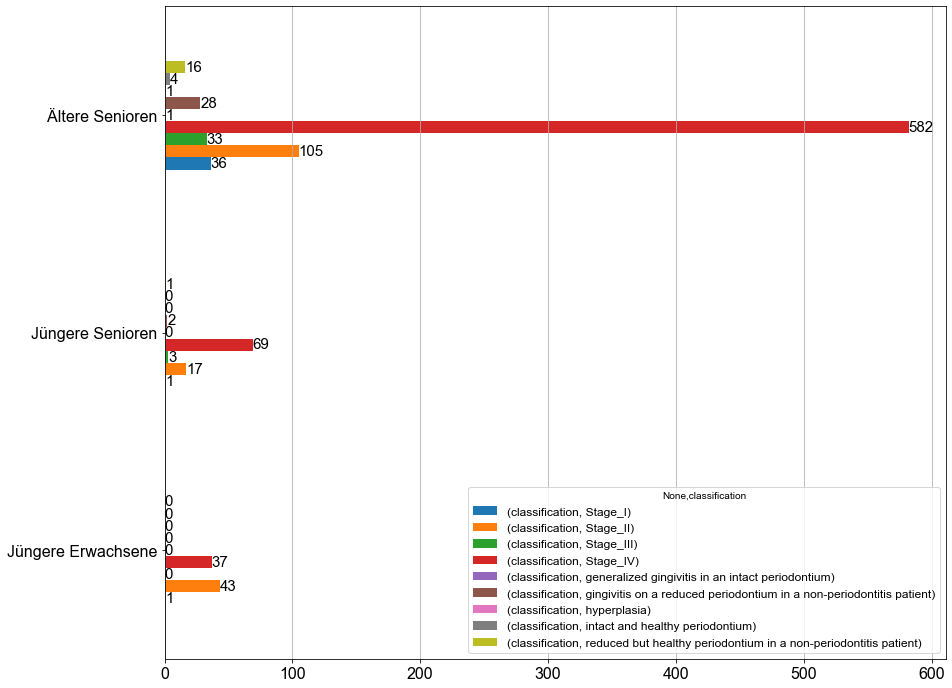

In [12]:
ax = (
    pd.DataFrame(data.groupby("altgr")["classification"].value_counts().sort_index())
    .unstack()
    .plot.barh()
)

for container in ax.containers:
    ax.bar_label(container, size=15)
ax.grid(axis="x")
ax.set_ylabel("")
fig = plt.gcf()
fig.set_size_inches(14, 12)

### Extend

In [13]:
pd.DataFrame(data.groupby("altgr")["extend"].value_counts().sort_index())

extend
altgr              extend                    
Jüngere Erwachsene generalized (≥30%)      41
                   localized (<30%)        39
Jüngere Senioren   generalized (≥30%)      48
                   localized (<30%)        30
Ältere Senioren    generalized (≥30%)     393
                   localized (<30%)       196

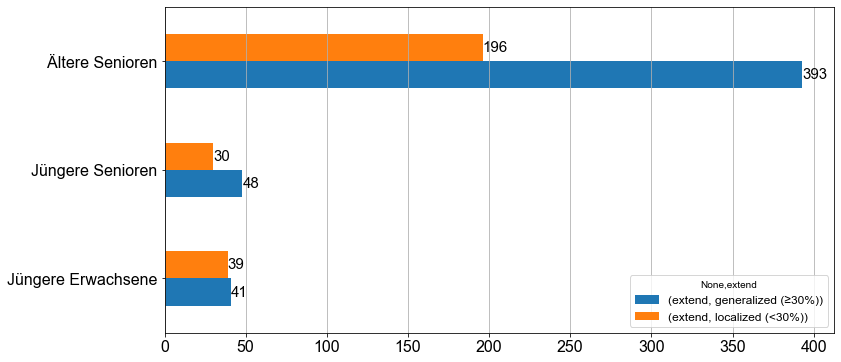

In [14]:
ax = (
    pd.DataFrame(data.groupby("altgr")["extend"].value_counts().sort_index())
    .unstack()
    .plot.barh()
)

ax.grid(axis="x")
ax.set_ylabel("")
for container in ax.containers:
    ax.bar_label(container, size=15)

### Classification and Extend

In [15]:
pd.DataFrame(data.groupby("altgr")["res"].value_counts().sort_index())

res
altgr              res                                
Jüngere Erwachsene Stage_I - generalized (≥30%)      1
                   Stage_II - generalized (≥30%)    33
                   Stage_II - localized (<30%)      10
                   Stage_IV - generalized (≥30%)     7
                   Stage_IV - localized (<30%)      29
Jüngere Senioren   Stage_I - localized (<30%)        1
                   Stage_II - generalized (≥30%)    12
                   Stage_II - localized (<30%)       2
                   Stage_III - generalized (≥30%)    3
                   Stage_IV - generalized (≥30%)    33
                   Stage_IV - localized (<30%)      27
Ältere Senioren    Stage_I - generalized (≥30%)      2
                   Stage_I - localized (<30%)        1
                   Stage_II - generalized (≥30%)    53
                   Stage_II - localized (<30%)      26
                   Stage_III - generalized (≥30%)    9
                   Stage_III - localized (<30%)      2
                   Stage_IV - generalized (≥30%)   329
                   Stage_IV - localized (<30%)     167

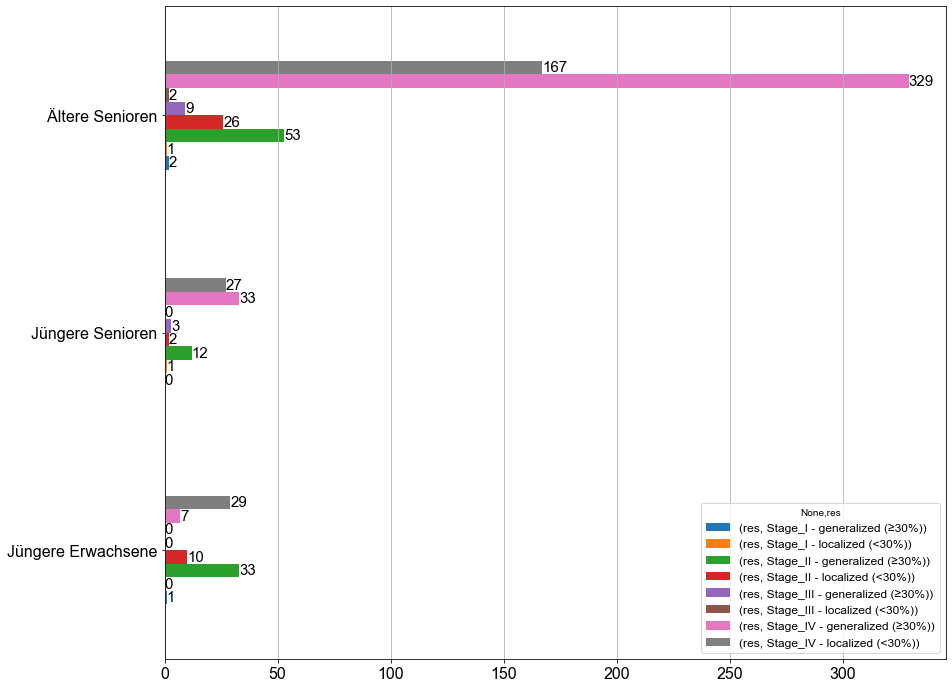

In [16]:
ax = (
    pd.DataFrame(data.groupby("altgr")["res"].value_counts().sort_index())
    .unstack()
    .plot.barh()
)

for container in ax.containers:
    ax.bar_label(container, size=15)
ax.grid(axis="x")
ax.set_ylabel("")
fig = plt.gcf()
fig.set_size_inches(14, 12)